data/public/videos/24_i_livingroom_leaves_mp.mp4 data/public/masks/24_i_livingroom_mp.png data/public/backgrounds/livingroom.png


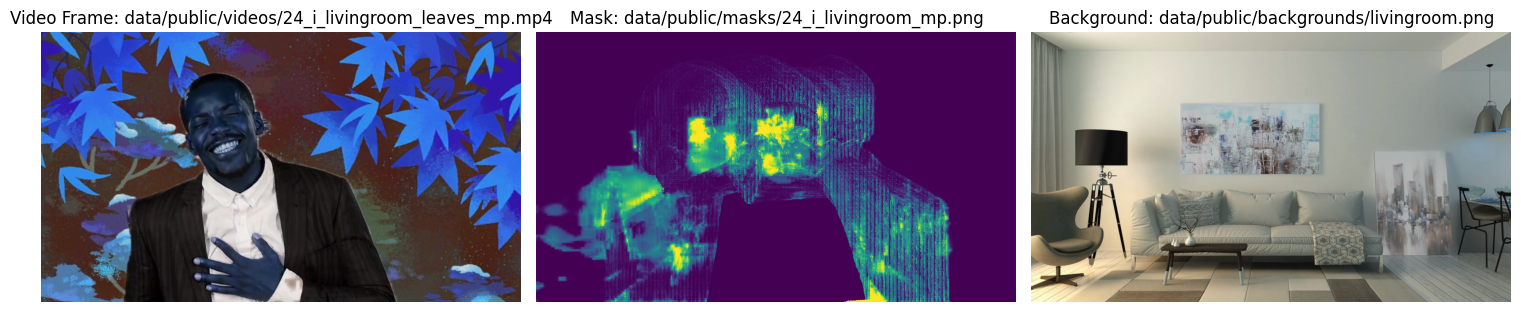

In [1]:
import numpy as np
import cv2
from pathlib import Path
from src.data_loader import load_triplets, display_video
from util import (load_video, load_background, load_mask, metric_CIEDE2000, evaluate)

video_triplets = load_triplets("data/public/backgrounds", "data/public/videos", "data/public/masks")
for video_path, mask_path, bg_path in video_triplets:
    print(video_path, mask_path, bg_path)
    break


VIDEO_SAMPLE_IDX = 0
sample = video_triplets[VIDEO_SAMPLE_IDX]
video = dict(
    video=np.array(load_video(sample[0])),
    mask=load_mask(sample[1]),
    background=load_background(sample[2])
)

display_video(video, sample)

In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

video_numpy = video["video"].astype(np.uint8)
video_numpy[0:1]

Using device: cuda


array([[[[ 55,  26, 172],
         [ 55,  26, 172],
         [ 55,  27, 171],
         ..., 
         [ 77,  70,  62],
         [ 79,  72,  64],
         [ 80,  73,  65]],

        [[ 52,  23, 169],
         [ 52,  23, 169],
         [ 53,  25, 169],
         ..., 
         [ 74,  67,  59],
         [ 75,  68,  60],
         [ 75,  68,  60]],

        [[ 47,  18, 170],
         [ 47,  18, 170],
         [ 45,  20, 168],
         ..., 
         [ 69,  62,  54],
         [ 72,  64,  54],
         [ 72,  64,  54]],

        ..., 
        [[ 70,  62,  62],
         [ 63,  55,  55],
         [ 63,  56,  53],
         ..., 
         [ 69,  51,  41],
         [ 70,  50,  40],
         [ 68,  48,  38]],

        [[ 66,  57,  54],
         [ 61,  52,  49],
         [ 62,  54,  49],
         ..., 
         [ 72,  49,  40],
         [ 72,  49,  40],
         [ 72,  49,  40]],

        [[ 62,  53,  50],
         [ 61,  52,  49],
         [ 62,  54,  49],
         ..., 
         [ 69,  46,  37],
  

In [3]:
video_gpu = torch.from_numpy(video_numpy).to(device) # Keep as 0-255 float

In [4]:
video_gpu.shape, video_gpu.dtype

(torch.Size([699, 720, 1280, 3]), torch.uint8)

In [5]:
video_mode = video_gpu.mode(dim=0)

In [6]:
video_mode.values.shape

torch.Size([720, 1280, 3])

In [7]:
video_mode.indices.shape

torch.Size([720, 1280, 3])

In [8]:
video_mode.indices.shape

torch.Size([720, 1280, 3])

In [9]:
video_mode_numpy = video_mode.values.cpu().numpy().astype(np.uint8)


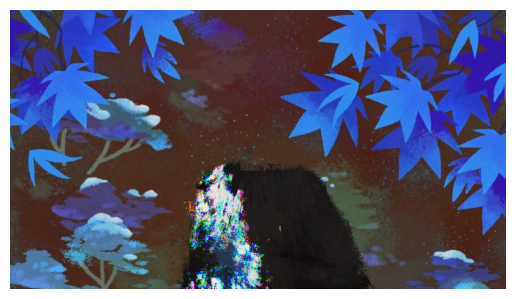

In [13]:
from src.helpers import show_image_from_tensor

show_image_from_tensor(video_mode_numpy)

In [16]:
torch.cuda.empty_cache()

Loading video: data/public/videos/24_i_livingroom_leaves_mp.mp4
Video loaded. Shape: (699, 720, 1280, 3)
Starting background reconstruction on GPU...


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.40 GiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 10.23 GiB is allocated by PyTorch, and 18.52 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)